In [1]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
using Luxor                           #This package is for drawing simple static vector graphics
using Colors                          #This package provides a wide array of functions for dealing with color.

    Updating registry at `C:\Users\17404\.julia\registries\General.toml`
┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 60, "schannel: SNI or certificate check failed: SEC_E_WRONG_PRINCIPAL (0x80090322)", Downloads.Response("https", "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.7\Pkg\src\Registry\Registry.jl:82
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`


In [2]:
phi = (1 + sqrt(5)) / 2                # Define the Golden ratio by phi

1.618033988749895

In [3]:
sidelength = 100                       # Set up a sidelength for each tile's short edge

100

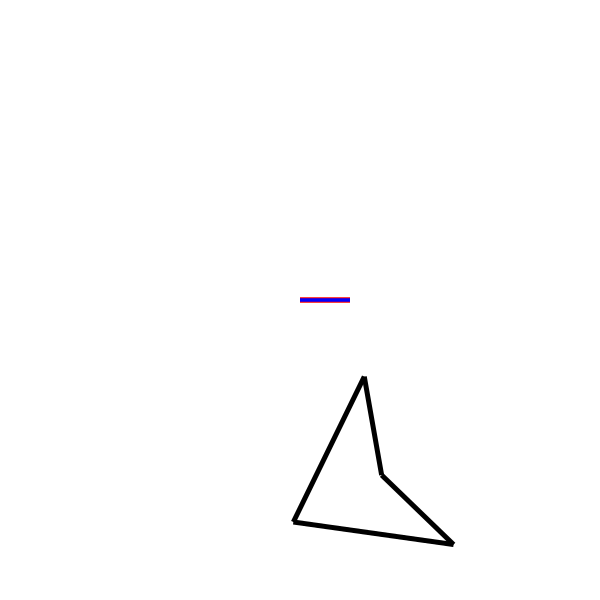

In [4]:
function dart(radialdistance, polarangle, orientation) #function for drawing a dart
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)                            # let pen up, then no tracks left
    Turn(t, polarangle)                 # adjust the angle for first the forward
    Forward(t, radialdistance)          # setp forward by radialdistance
    Turn(t, -polarangle)                # turn back to horizontal line
    Turn(t, orientation)                # adjust the rotation angle for each tile
    Pendown(t)                          # let pen down for drawing the tile
    
    #start to draw a dart 
    Pencolor(t, "Black")                # change the pen color to black
    Forward(t, sidelength)              # draw first edge of the dart
    Turn(t, -36)                        # turn an angle to second edge
    Forward(t, sidelength)              # draw second edge of the dart
    Turn(t, 144)                        # turn an angle to third edge
    Forward(t, sidelength * phi)        # draw third edge of the dart
    Turn(t, 108)                        # turn an angle to fourth edge
    Forward(t, sidelength * phi)        # draw fourth edge of the dart
    Turn(t, 144)                        # turn back to horizontal 0 line
    
    #move the turtle back to the origin
    Penup(t)                            # let pen up, then no tracks left
    Turn(t, -orientation)               # turn back to horizontal line
    Turn(t, polarangle)                 # adjust the angle for first the forward
    Forward(t, -radialdistance)         # setp backward by radialdistance
    Turn(t, -polarangle)                # turn back to horizontal line
    Pendown(t)                          # let pen down for drawing the tile
end

# make a example graph of a dart with any position and orientation
@draw begin
    t = Turtle()                       # give turtle a title
    Penwidth(t,5)                      # set the penwidth of the turtle
    
    #check the starting point
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    #draw a dart
    dart(100,50,80)                    # find a dart with any position and orientation
    
    #check the ending point
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

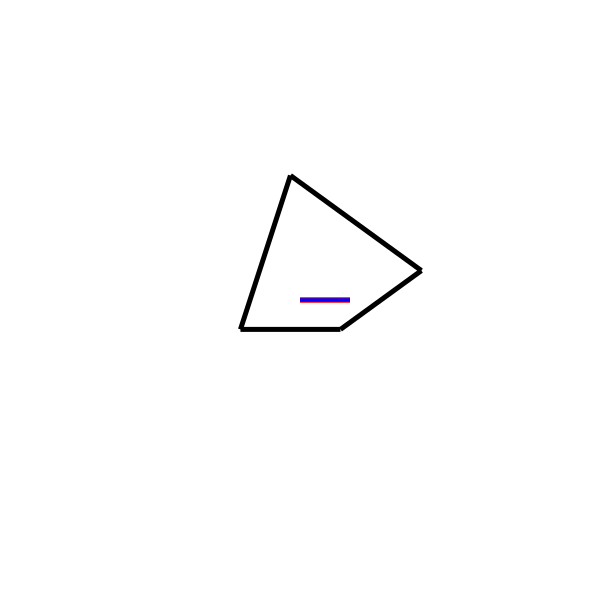

In [5]:
function kite(radialdistance, polarangle, orientation) #function for drawing a kite
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)                            # let pen up, then no tracks left
    Turn(t, polarangle)                 # adjust the angle for first the forward
    Forward(t, radialdistance)          # setp forward by radialdistance
    Turn(t, -polarangle)                # turn back to horizontal line
    Turn(t, orientation)                # adjust the rotation angle for each tile
    Pendown(t)                          # let pen down for drawing the tile
    
    #start to draw a kite
    Pencolor(t, "Black")                # change the pen color to black
    Turn(t, 108)                        # # turn an angle to first edge
    Forward(t, sidelength)              # draw first edge of the dart
    Turn(t, 108)                        # turn an angle to second edge
    Forward(t, sidelength * phi)        # draw second edge of the dart
    Turn(t, 108)                        # turn an angle to third edge
    Forward(t, sidelength * phi)        # draw third edge of the dart
    Turn(t, 108)                        # turn an angle to fourth edge
    Forward(t, sidelength)              # draw fourth edge of the dart
    Turn(t, -72)                        # turn back to horizontal 0 line
    
    #move the turtle back to the origin
    Penup(t)                            # let pen up, then no tracks left
    Turn(t, -orientation)               # turn back to horizontal line
    Turn(t, polarangle)                 # adjust the angle for first the forward
    Forward(t, -radialdistance)         # setp backward by radialdistance
    Turn(t, -polarangle)                # turn back to horizontal line
    Pendown(t)                          # let pen down for drawing the tile)
end

# make a example graph of a kite with any position and orientation
@draw begin
    t = Turtle()                       # give turtle a title
    Penwidth(t,5)                      # set the penwidth of the turtle
    
    #check the starting point
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    #draw a kite
    kite(50,36,72)                     # find a kite with any position and orientation
    
    #check the ending point
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

In [6]:
function draw(graph) # function for drawing dart or kite by stored information
    for i in 1:length(graph)                             # graph is list of all tiles，run this loop for number of graph times
        if graph[i][1] == "K"                            # when the tile is kite
            kite(graph[i][2],graph[i][3],graph[i][4])    # draw a kite at the position and orientation as it in the graph list
        else                                             # When the tile is dart
            dart(graph[i][2],graph[i][3],graph[i][4])    # draw a dart at the position and orientation as it in the graph list
        end
    end
end

draw (generic function with 1 method)

In [7]:
function substitution(graph) # function for doing substitution of each tile with same size kite and dart
    
    number_tiles = length(graph)                                # Remember the number of tiles at the beginning
    
    for i in 1:length(graph)                                   # Do substitution for each tile
        
        if graph[i][1] == "K"                                  # When this tile is kite
            
            # find the y-intercept after vector addtion
            y = graph[i][2]                                    # the radialdistance from the origin
            * sin(-(graph[i][3] * pi / 180))                   # the y-intercept of the radialdistance with the original polarangle
            + sidelength                                       # the short edge of kite
            * sin((180 - graph[i][4]) * pi / 180)              # the y-intercept of sidelength with the (180-orientation)
            
            # find the x-intercept after vector addtion
            x = graph[i][2]                                    # the radialdistance from the origin    
            * cos(-(graph[i][3] * pi / 180))                   # the x-intercept of the radialdistance with the original polarangle
            + sidelength                                       # the short edge of kite
            * cos((180 - graph[i][4]) * pi / 180)              # the x-intercept of sidelength with the (180-orientation)
            
            new_radialdistance = sqrt(y^2+x^2)                 # find the new distance by doing a vector addition
            
            #Find the new angle based on the x-y relation
            if x > 0                                          # if it is in the first or fourth quadrants
                new_polarangle = atan(y/x) * 180 /pi          # give atan value
            elseif x < 0 && y >= 0                           # if it is in the second quadrant
                new_polarangle = atan(y/x) * 180 /pi + 180    # give an opposite atan value
            elseif x < 0 && y < 0                            # if it is in the third quadrant
                new_polarangle = atan(y/x) * 180 /pi - 180    # give an opposite atan value
            elseif x == 0 && y > 0                          # if it is on positive y-axis
                new_polarangle = 90                           # give 90
            elseif x == 0 && y < 0                          # if it is on negitive y-axis
                new_polarangle = -90                          # give -90
            elseif x == 0 && y == 0                         # if it is on origin
                new_polarangle = 0                           # give 0
            end
            
            #darw new tiles
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] + 108]) # add a new kite with the position
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108]) # add a new kite with the position
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144]) # add a new dart with the position
            
        else                                                  # When this tile is dart
            
            # find the y-intercept after vector addtion
            y = graph[i][2]                                   # the radialdistance from the origin
            * sin(-(graph[i][3] * pi / 180))                  # the y-intercept of the radialdistance with the original polarangle
            + sidelength * phi                                # the length of the short edge of kite times phi
            * sin(-(graph[i][4] * pi / 180))                  # the x-intercept of sidelength times phi with the (-orientation)
            
            # find the x-intercept after vector addtion
            x = graph[i][2]                                   # the radialdistance from the origin 
            * cos(-(graph[i][3] * pi / 180))                  # the x-intercept of the radialdistance with the original polarangle
            + sidelength * phi                                # the length of the short edge of kite times phi
            * cos(-(graph[i][4] * pi / 180))                  # the x-intercept of sidelength times phi with the (-orientation)
            
            new_radialdistance = sqrt(y^2+x^2)                # find the new distance by doing a vector addition
            
            #Find the new angle based on the x-y relation
            if x > 0                                          # if it is in the first or fourth quadrants
                new_polarangle = atan(y/x) * 180 /pi          # give atan value
            elseif x < 0 && y >= 0                           # if it is in the second quadrant
                new_polarangle = atan(y/x) * 180 /pi + 180    # give an opposite atan value
            elseif x < 0 && y < 0                            # if it is in the third quadrant
                new_polarangle = atan(y/x) * 180 /pi - 180    # give an opposite atan value
            elseif x == 0 && y > 0                           # if it is on positive y-axis
                new_polarangle = 90                           # give 90
            elseif x == 0 && y < 0                           # if it is on negitive y-axis
                new_polarangle = -90                          # give -90
            elseif x == 0 && y == 0                         # if it is on origin
                new_polarangle = 0                            # give 0
            end
            
            push!(graph, ["K",new_radialdistance,-new_polarangle,graph[i][4] - 108]) # add a new kite with the position
            push!(graph, ["D",new_radialdistance,-new_polarangle,graph[i][4] + 144]) # add a new dart with the position
        end
    end
    
    for i in 1:number_tiles                                 # repeat number of tiles in the original list
        popfirst!(graph)                                     # remove all of old tiles befroe the substituion
    end
    
end

substitution (generic function with 1 method)

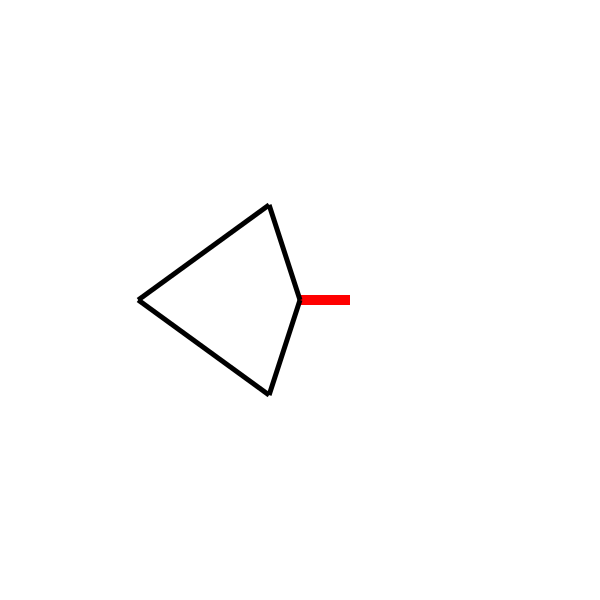

In [8]:
graph = [["K",0,0,0]]# initial kite

@draw begin
    t = Turtle()
    
    # origin cheaker
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph) # draw every tile in graph list
end

In [9]:
substitution(graph)
graph

3-element Vector{Vector{Any}}:
 ["K", 100.0, -180.0, 108]
 ["K", 100.0, -180.0, -108]
 ["D", 100.0, -180.0, 144]

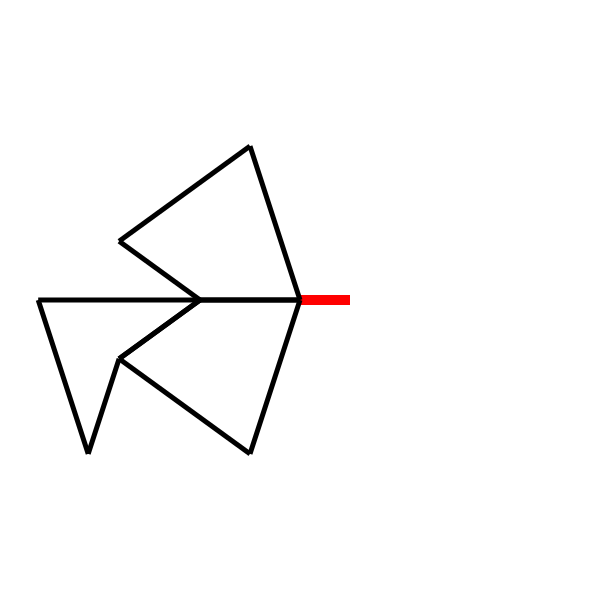

In [10]:
@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [11]:
substitution(graph)
graph

8-element Vector{Vector{Any}}:
 ["K", 117.55705045849463, -126.0, 216]
 ["K", 117.55705045849463, -126.0, 0]
 ["D", 117.55705045849463, -126.0, 252]
 ["K", 117.55705045849463, 126.0, 0]
 ["K", 117.55705045849463, 126.0, -216]
 ["D", 117.55705045849463, 126.0, 36]
 ["K", 249.72120409568325, 157.61382244080323, 36]
 ["D", 249.72120409568325, 157.61382244080323, 288]

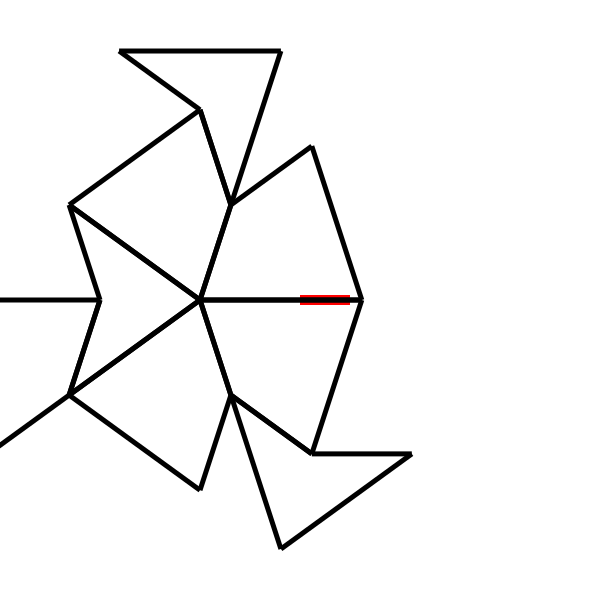

In [12]:
@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

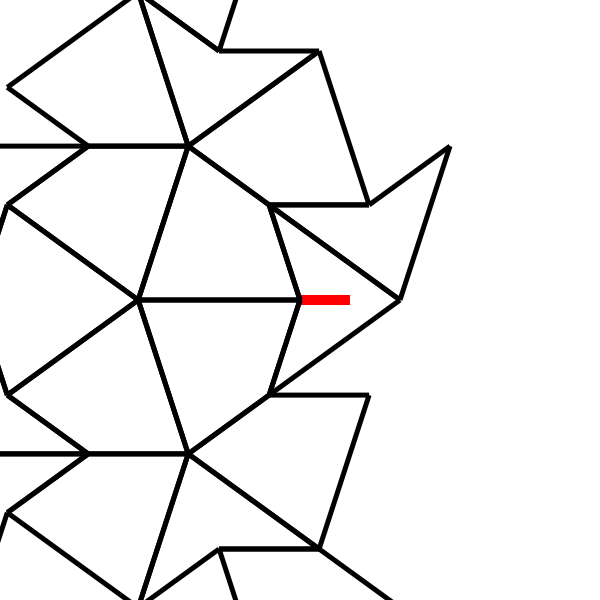

In [13]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,5)
    draw(graph)
end

In [14]:
sidelength = 10

10

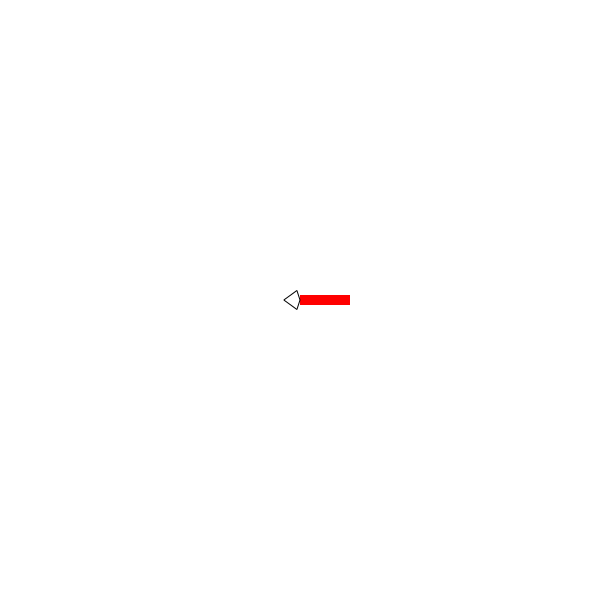

In [15]:
graph = [["K",0,0,0]]

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,1)
    draw(graph)
end

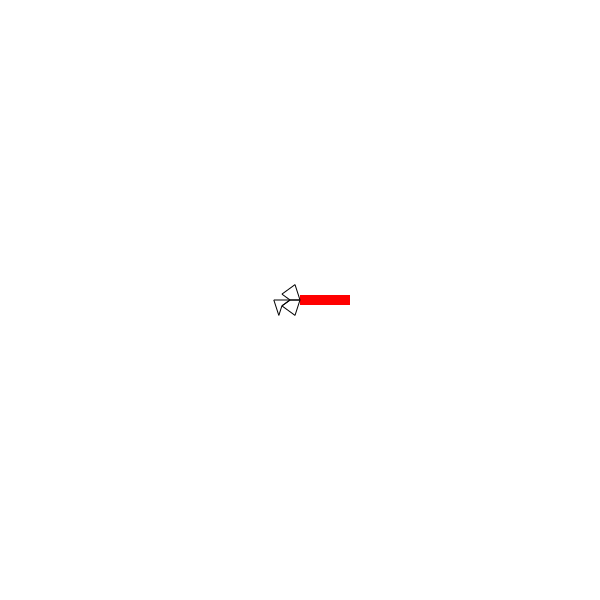

In [16]:
substitution(graph)
graph

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,1)
    draw(graph)
end

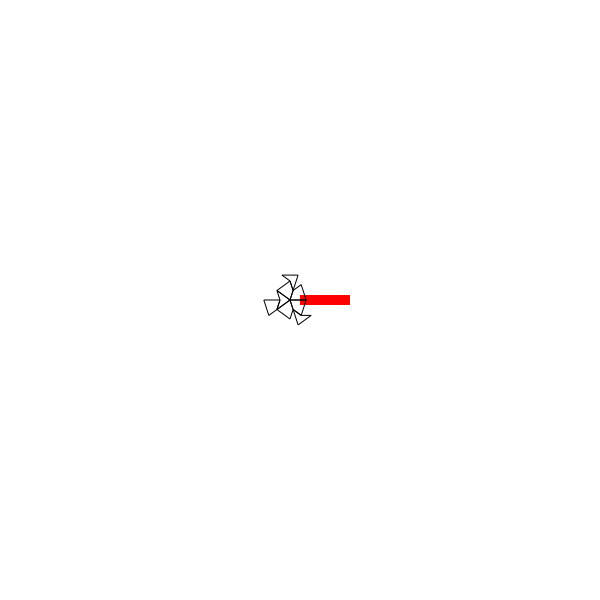

In [17]:
substitution(graph)
graph

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,1)
    draw(graph)
end

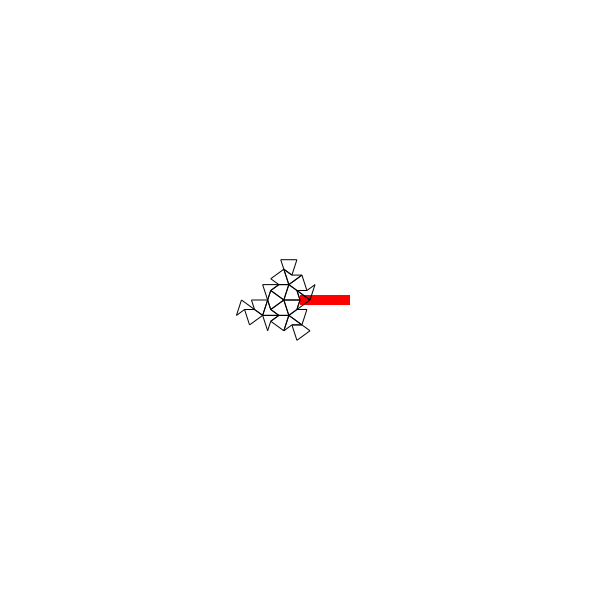

In [18]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@draw begin
    t = Turtle()
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,1)
    draw(graph)
end

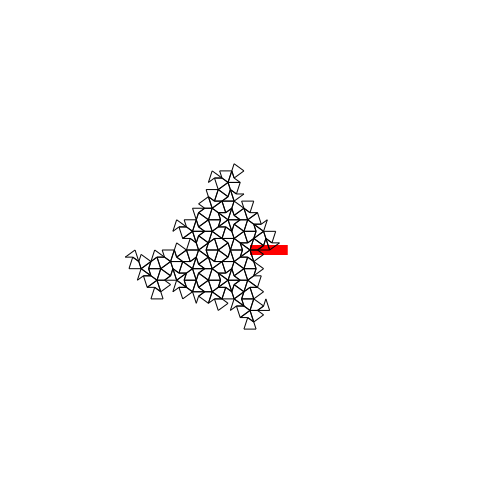

In [20]:
for i in 1:length(graph)
    graph[i][2] = graph[i][2] * phi
end
substitution(graph)

@svg begin
    t = Turtle()
    scale(0.75)
    
    Pencolor(t, "Red")
    Penwidth(t, 10)
    Forward(t, 50)
    Forward(t, -50)
    
    Penwidth(t,1)
    draw(graph)
end 500 500 "tiling.svg"

In [21]:
graph

144-element Vector{Vector{Any}}:
 ["K", 34.77092167853688, -134.26769855229804, 540]
 ["K", 34.77092167853688, -134.26769855229804, 324]
 ["D", 34.77092167853688, -134.26769855229804, 576]
 ["K", 16.18033988749893, -144.0, 324]
 ["K", 16.18033988749893, -144.0, 108]
 ["D", 16.18033988749893, -144.0, 360]
 ["K", 26.180339887498928, 179.99999999999997, 360]
 ["D", 26.180339887498928, 179.99999999999997, 612]
 ["K", 34.7709216785369, -81.73230144770194, 324]
 ["K", 34.7709216785369, -81.73230144770194, 108]
 ["D", 34.7709216785369, -81.73230144770194, 360]
 ["K", 42.36067977499789, -107.99999999999999, 108]
 ["K", 42.36067977499789, -107.99999999999999, -108]
 ⋮
 ["K", 72.25979638861958, 172.43699940042688, 180]
 ["D", 72.25979638861958, 172.43699940042688, 432]
 ["K", 72.25979638861958, -172.4369994004269, 180]
 ["K", 72.25979638861958, -172.4369994004269, -36]
 ["D", 72.25979638861958, -172.4369994004269, 216]
 ["K", 56.26053309603326, -170.26769855229804, 216]
 ["D", 56.26053309603326,